# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Preparation

## Plot hypothesis

In [2]:
def plot_hypothesis(theta, X, Y, x_axis, title): # plot hypothesis wrt number of iterations
    
    plt.scatter(X,Y) # plotting the data points
    
    htheta = theta[0] + theta[1] * x_axis
    
    plt.plot(x_axis, htheta)
    
    plt.xlabel('Feature values')
    plt.ylabel('Hypothesis')
    plt.title(title)
    
    plt.show()

## Plot cost

In [3]:
def plot_cost(num_of_iterations, J):
    x_axis = np.linspace(0, num_of_iterations-1, num_of_iterations)
    plt.ylim((50,100))
    plt.plot(x_axis, J)
    
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost, J')
    plt.title('Visualising cost function with increasing number of iterations')
    
    plt.show()


## Compute cost

In [4]:
def compute_cost(m, error):
    return (1/(2*m)) * np.sum(error**2)

## Gradient descent

In [5]:
def gradient_descent(m, theta, alpha, num_of_iterations, X, Y):
    J = []
    for i in range(num_of_iterations):
        htheta_vector = np.dot(X,theta)
        error_vector = htheta_vector - Y
        
        gradient_vector = (1/m) * (np.dot(X.T, error_vector)) # each element in gradient_vector corresponds to each theta
        theta = theta - alpha * gradient_vector
        
        J.append(compute_cost(m, error_vector))
        
#         X_unbiased = np.delete(X, 0, axis=1)
#         x_axis = np.linspace(0, 80, 1000)
#         title = 'Intermediate model'
#         plot_hypothesis(theta, X_unbiased, Y, x_axis, title)

    plot_cost(num_of_iterations, J)
        
    return theta

## Main function

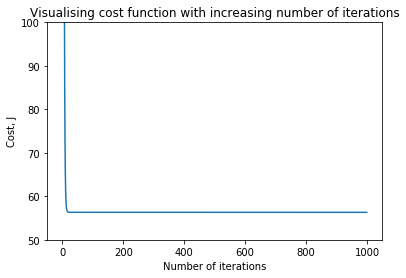

Parameters learned, theta = [[0.05905856]
 [1.47833133]]


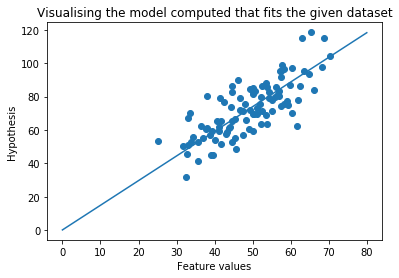

In [6]:
def main():
    df = pd.read_csv('data.csv', header = None)
    data = df.values
    
    X = data[:, 0]
    Y = data[:,1]
    
    m = (X.shape)[0] # number of training examples
    
    X = X.reshape(m,1)
    Y = Y.reshape(m,1)
    
    ones = np.ones(shape = (m,1))
#     print('X: \n' + str(X), 'Y: \n' + str(Y), sep = '\n')

    X_with_bias = np.concatenate([ones, X], axis = 1)
#     print(X_with_bias)
    
    theta = np.zeros(shape = (2,1))
#     print(theta)

    alpha = 0.0001 #learning rate
    num_of_iterations = 1000 # number of times gradient descent should step down theta values
    
    theta = gradient_descent(m, theta, alpha, num_of_iterations, X_with_bias, Y) # calling gradient descent
    print('Parameters learned, theta = ' + str(theta))
    
    title = 'Visualising the model computed that fits the given dataset'
    x_axis = np.linspace(0, 80, 1000)
    plot_hypothesis(theta, X, Y, x_axis, title)
    
if __name__ == '__main__':
    main()